<a href="https://colab.research.google.com/github/mhmd2015/ImageProcessing1UIC/blob/main/DIP_UIC_Week2_Filterers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image double: In Python, there isn't a direct equivalent to MATLAB's im2double. replicate its functionality using the popular image processing library, OpenCV, or NumPy.

In [6]:
def cv_im2double(image):
    info = image.dtype
    if info == 'uint8':
        return image.astype('float64') / 255.0
    elif info == 'uint16':
        return image.astype('float64') / 65535.0
    elif info == 'int16':
        return (image.astype('float64') + 32768) / 65535.0
    elif info == 'bool':
        return image.astype('float64')
    else:
        raise ValueError('Input type {} not supported'.format(info))


def im2double(image):
    info = image.dtype
    if info == np.uint8:
        return image.astype('float64') / 255.0
    elif info == np.uint16:
        return image.astype('float64') / 65535.0
    elif info == np.int16:
        return (image.astype('float64') + 32768) / 65535.0
    elif info == np.bool_:
        return image.astype('float64')
    else:
        raise ValueError('Input type {} not supported'.format(info))

def im2gray(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def imsave(filename,image):
    # Save the grayscale image (optional)
    cv2.imwrite(filename, image)

def imshow(image,type='gray'):
    plt.figure(figsize=(24, 16))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap=type)


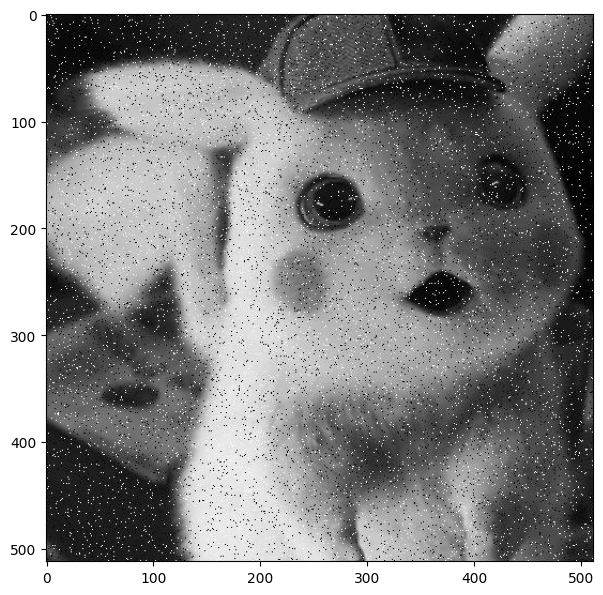

In [9]:
# Load image without changing its depth
image = cv2.imread('noise.jpeg', cv2.IMREAD_UNCHANGED)

# double it by numpy
img_double = im2double(image)

# double it by opencv
# img_double = cv_im2double(image)

imshow(img_double)

**Median Filter:**


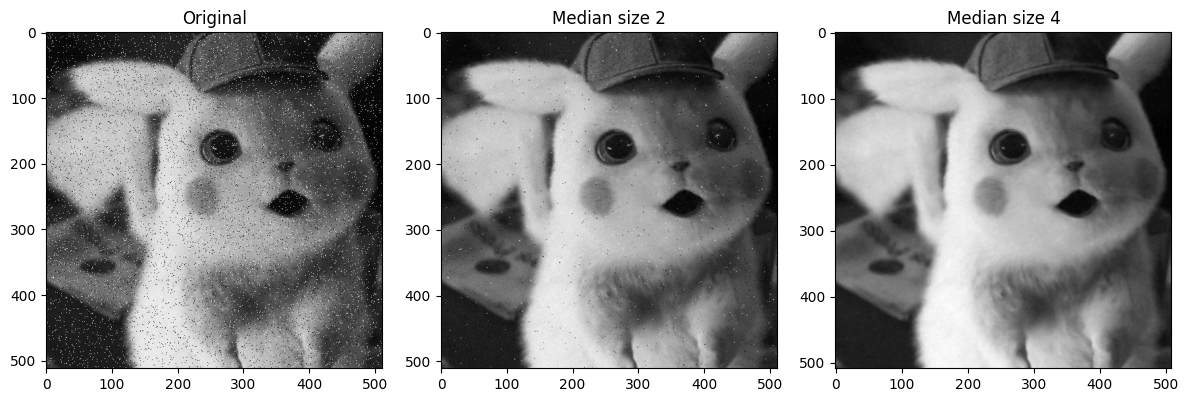

In [17]:
def median_filter_2d(image, filt_size):
    m, n = filt_size, filt_size  # assuming the filter is square
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.median(image[i:i+m, j:j+m])
    return new_image


# 1- read image
image = cv2.imread('noise.jpeg', cv2.IMREAD_GRAYSCALE)

# 2- process image
filter_size = 2
result_median2 = median_filter_2d(image, filter_size)

filter_size = 4
result_median4 = median_filter_2d(image, filter_size)



# 3- show image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(result_median2, cmap='gray')
plt.title('Median size 2')

plt.subplot(1, 3, 3)
plt.imshow(result_median4, cmap='gray')
plt.title('Median size 4')

plt.tight_layout()
plt.show()



**Sobel Filter**

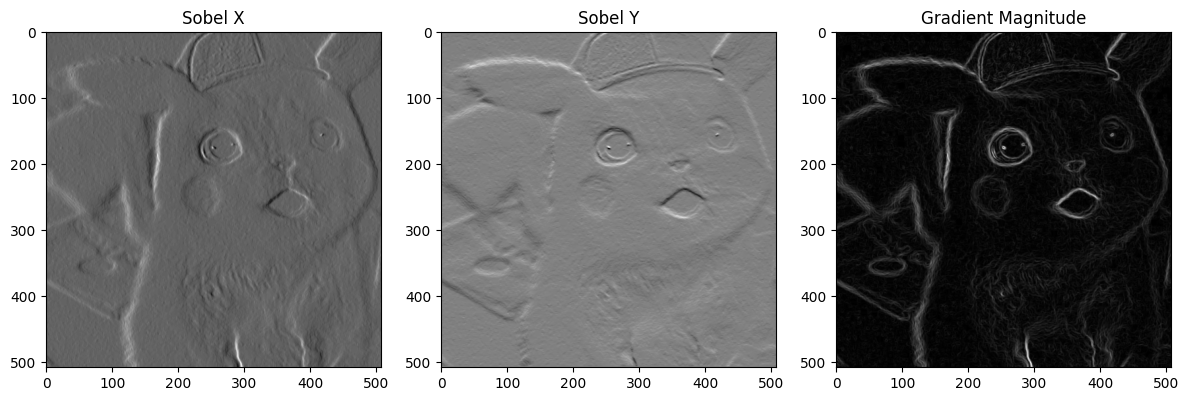

In [21]:

using_double = True

if using_double:
  # convert to double
  image_data = cv2.imread('noise.jpeg', cv2.IMREAD_GRAYSCALE)
  image = im2double(image_data)

else:
  # Load the image in grayscale
  image = cv2.imread('noise.jpeg', cv2.IMREAD_GRAYSCALE)

# can add Median Filter
image = median_filter_2d(image, 4)


# Apply Sobel operator in X direction
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel operator in Y direction
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# You can also compute the magnitude of the gradient
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)





#imshow(sobelx)
#imshow(sobely)
#imshow(gradient_magnitude)
# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.tight_layout()
plt.show()


Canny Filter

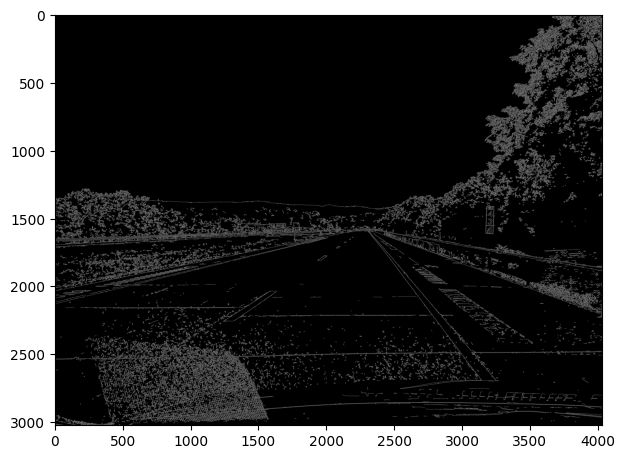

In [ ]:


# Read the image
image = cv2.imread('20220723_125312.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Apply Canny edge detector
edges = cv2.Canny(gray_image, 50, 150)  # 50 and 150 are the minVal and maxVal thresholds

# Save the edge-detected image (optional)
cv2.imwrite('edges.jpg', edges)

# Display the edge-detected image
plt.figure(figsize=(24, 16))

plt.subplot(1, 3, 1)
plt.imshow(edges, cmap='gray')

**Wavelet**

In [22]:
import pywt

In [36]:
image = cv2.imread("noise.jpeg", cv2.IMREAD_GRAYSCALE)

# can add Median Filter
image = median_filter_2d(image, 4)

#Perform the single-level wavelet transform:

coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

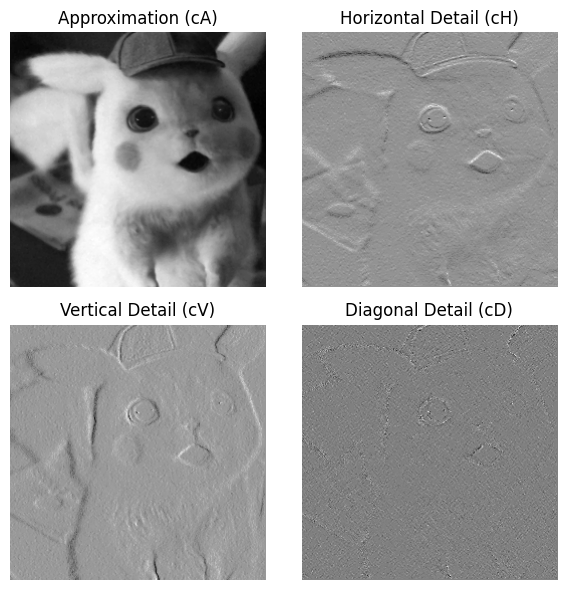

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs[0, 0].imshow(cA, cmap='gray')
axs[0, 0].set_title('Approximation (cA)')
axs[0, 0].axis('off')
axs[0, 1].imshow(cH, cmap='gray')
axs[0, 1].set_title('Horizontal Detail (cH)')
axs[0, 1].axis('off')
axs[1, 0].imshow(cV, cmap='gray')
axs[1, 0].set_title('Vertical Detail (cV)')
axs[1, 0].axis('off')
axs[1, 1].imshow(cD, cmap='gray')
axs[1, 1].set_title('Diagonal Detail (cD)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [55]:
image = cv2.imread("noise.jpeg", cv2.IMREAD_GRAYSCALE)

# can add Median Filter
image = median_filter_2d(image, 4)

#Perform the single-level wavelet transform:

coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

In [56]:
# TEST 1

# Apply the hard thresholding operator on the detail coefficients:
threshold = 30 #5  # or 10, depending on your preference

cH_thresh = np.where(np.abs(cH) > threshold, cH, 0)
cV_thresh = np.where(np.abs(cV) > threshold, cV, 0)
cD_thresh = np.where(np.abs(cD) > threshold, cD, 0)



#Reconstruct the image using the inverse wavelet transform:
image_reconstructed = pywt.idwt2((cA, (cH_thresh, cV_thresh, cD_thresh)), 'haar')


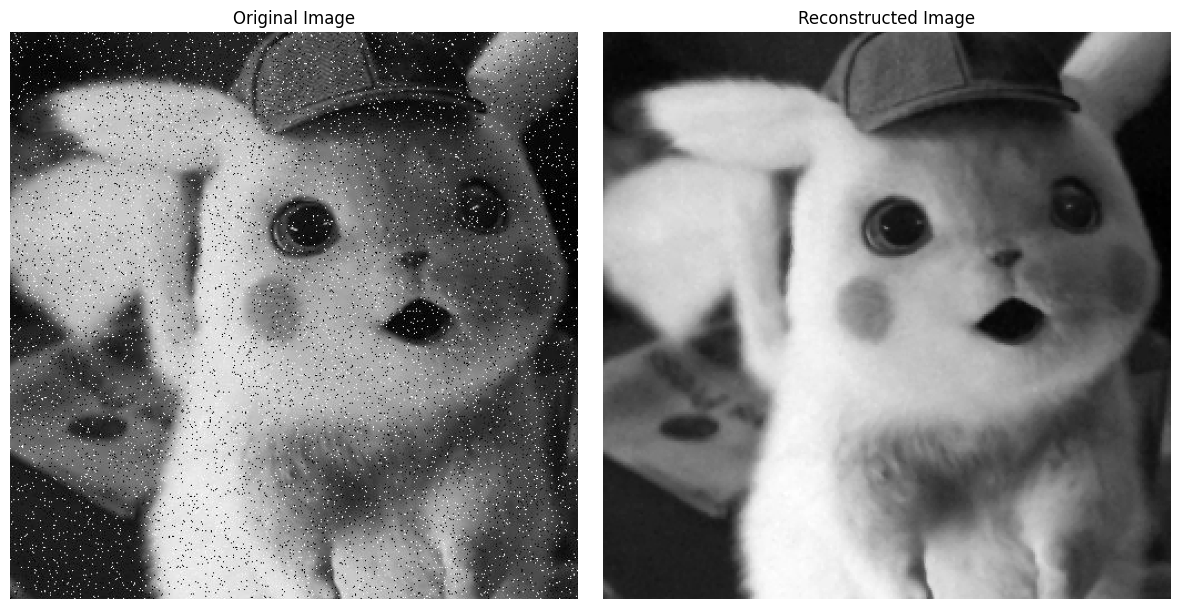

In [63]:
#Visualize the original and reconstructed images:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(image_reconstructed.astype('uint8'), cmap='gray')
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

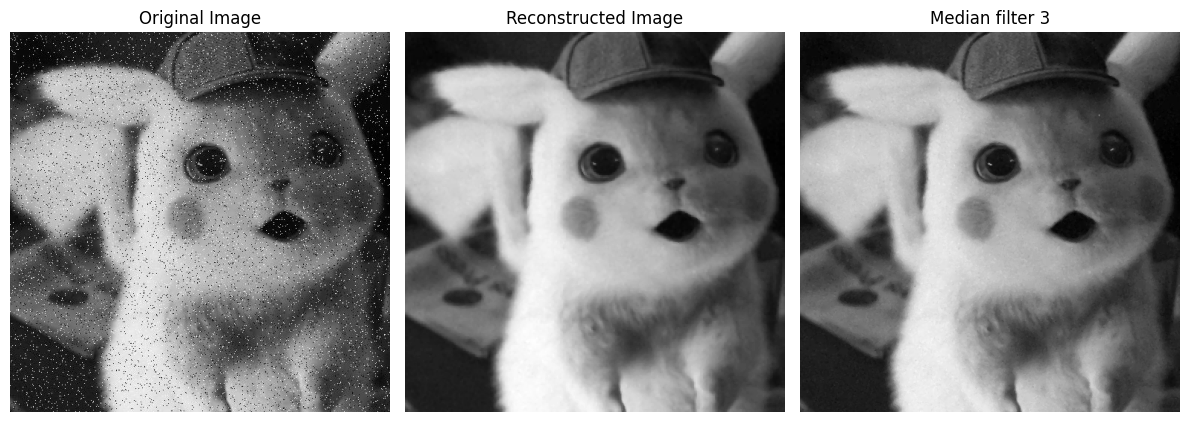

In [64]:
# TEST 2
# wavelet filter can be close to Median Filter


def hard_thresholding(data, threshold):
    return data * (abs(data) > threshold)

image = cv2.imread("noise.jpeg", cv2.IMREAD_GRAYSCALE)
# can add Median Filter
median = median_filter_2d(image, 3)

coeffs = pywt.dwt2(image, 'db1')
LL, (LH, HL, HH) = coeffs
# Apply hard-thresholding
Th = 5  # You can also try Th=10 later
LH_thresholded = hard_thresholding(LH, Th)
HL_thresholded = hard_thresholding(HL, Th)
HH_thresholded = hard_thresholding(HH, Th)

# Inverse wavelet transform
reconstructed_image = pywt.idwt2((LL, (LH_thresholded, HL_thresholded, HH_thresholded)), 'db1')


#Visualize the original and reconstructed images:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(image_reconstructed.astype('uint8'), cmap='gray')
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')

axs[2].imshow(median, cmap='gray')
axs[2].set_title('Median filter 3')
axs[2].axis('off')

plt.tight_layout()
plt.show()




---


**Histogram**

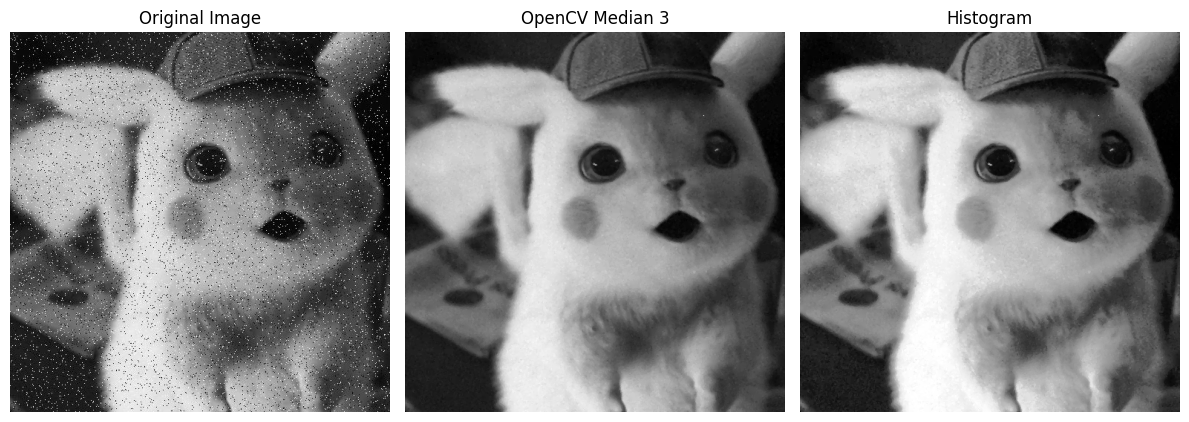

In [70]:
# Load the image :
image = cv2.imread("noise.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply median filtering:
median_filtered = cv2.medianBlur(image, 3)  # Apply median filtering with a kernel size of 3x3

# Apply histogram equalization:
equalized = cv2.equalizeHist(median_filtered)




#Visualize the original and reconstructed images:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(median_filtered, cmap='gray')
axs[1].set_title('OpenCV Median 3')
axs[1].axis('off')

axs[2].imshow(equalized, cmap='gray')
axs[2].set_title('Histogram')
axs[2].axis('off')

plt.tight_layout()
plt.show()

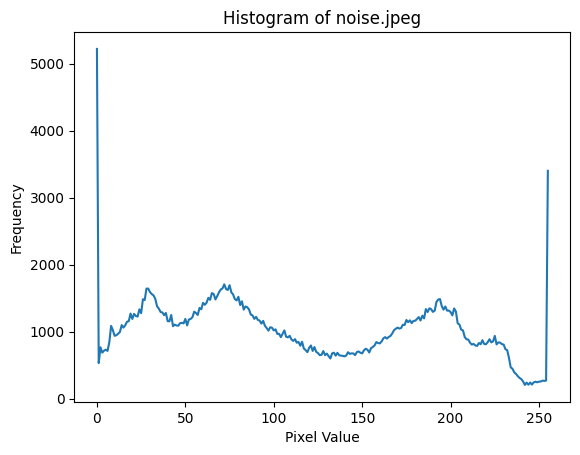

In [71]:

# Read the image in grayscale
image = cv2.imread('noise.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0,256])

# Plot histogram
plt.plot(hist)
plt.title('Histogram of noise.jpeg')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



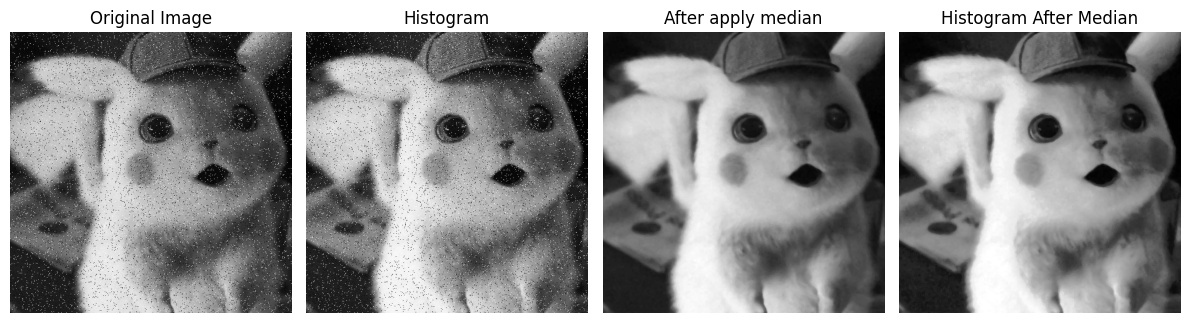

In [82]:
image = cv2.imread('noise.jpeg', cv2.IMREAD_GRAYSCALE)
equalized= cv2.equalizeHist(image)


# Apply median filtering
median_filtered = cv2.medianBlur(image, 5)  # using a 5x5 kernel as an example

# Apply histogram equalization
equalized_median_filtered = cv2.equalizeHist(median_filtered)
"""
# Display the equalized image (optional)
plt.imshow(equalized_image, cmap='gray')
plt.show()
"""
#Visualize the original and reconstructed images:
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(equalized, cmap='gray')
axs[1].set_title('Histogram')
axs[1].axis('off')

axs[2].imshow(median_filtered, cmap='gray')
axs[2].set_title('After apply median')
axs[2].axis('off')

axs[3].imshow(equalized_median_filtered, cmap='gray')
axs[3].set_title('Histogram After Median')
axs[3].axis('off')

plt.tight_layout()
plt.show()